In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('heart failure').getOrCreate()
spark

In [2]:
data = spark.read.csv("C:\\Users\\HAI\\Downloads\\heart_failure_clinical_records_dataset.csv",header = True,inferSchema = True)
data.show()

+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
|75.0|      0|                     582|       0|               20|                  1| 265000.0|             1.9|         130|  1|      0|   4|          1|
|55.0|      0|                    7861|       0|               38|                  0|263358.03|             1.1|         136|  1|      0|   6|          1|
|65.0|      0|                     146|       0|               20|                  0| 162000.0|             1.3|         129|  1|      1|   7|          1|
|50.0|      1|                     111|       0|               2

In [3]:
 data.printSchema()

root
 |-- age: double (nullable = true)
 |-- anaemia: integer (nullable = true)
 |-- creatinine_phosphokinase: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- ejection_fraction: integer (nullable = true)
 |-- high_blood_pressure: integer (nullable = true)
 |-- platelets: double (nullable = true)
 |-- serum_creatinine: double (nullable = true)
 |-- serum_sodium: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- time: integer (nullable = true)
 |-- DEATH_EVENT: integer (nullable = true)



In [4]:
from pyspark.sql.functions import count,col,when,isnan
data.select([count(when(col(c).isNull(),c)).alias(c) for c in data.columns]).show()

+---+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
|age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|
+---+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+
|  0|      0|                       0|       0|                0|                  0|        0|               0|           0|  0|      0|   0|          0|
+---+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+



In [5]:
#example 
#Imputer - remove null values
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols = ['anaemia','smoking'],
                 outputCols = ['{}_imputed'.format(c) for c in ['anaemia','smoking'] ]).setStrategy('mean')
data = imputer.fit(data).transform(data)
data.show(5)

+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+---------------+---------------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|anaemia_imputed|smoking_imputed|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+---------------+---------------+
|75.0|      0|                     582|       0|               20|                  1| 265000.0|             1.9|         130|  1|      0|   4|          1|              0|              0|
|55.0|      0|                    7861|       0|               38|                  0|263358.03|             1.1|         136|  1|      0|   6|          1|              0|              0|
|65.0|      0|                     146|       0|            

In [6]:
#check the correltaion
data.toPandas().corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,anaemia_imputed,smoking_imputed
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729,0.088006,0.018668
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270,1.000000,-0.107290
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728,-0.190741,0.002421
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943,-0.012729,-0.147173
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603,0.031557,-0.067315
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351,0.038182,-0.055711
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139,-0.043786,0.028234
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278,0.052174,-0.027414
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204,0.041882,0.004813
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316,-0.094769,0.445892


In [7]:
data.groupBy('DEATH_EVENT').count().show()

+-----------+-----+
|DEATH_EVENT|count|
+-----------+-----+
|          1|   96|
|          0|  203|
+-----------+-----+



In [8]:
new_data = data.drop('DEATH_EVENT')
new_data.toPandas()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,anaemia_imputed,smoking_imputed
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,1


In [9]:
cols = new_data.columns
cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'anaemia_imputed',
 'smoking_imputed']

In [10]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = cols,outputCol = 'Independent Features')
data = assembler.transform(data)
data.show(10)

+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+---------------+---------------+--------------------+
| age|anaemia|creatinine_phosphokinase|diabetes|ejection_fraction|high_blood_pressure|platelets|serum_creatinine|serum_sodium|sex|smoking|time|DEATH_EVENT|anaemia_imputed|smoking_imputed|Independent Features|
+----+-------+------------------------+--------+-----------------+-------------------+---------+----------------+------------+---+-------+----+-----------+---------------+---------------+--------------------+
|75.0|      0|                     582|       0|               20|                  1| 265000.0|             1.9|         130|  1|      0|   4|          1|              0|              0|[75.0,0.0,582.0,0...|
|55.0|      0|                    7861|       0|               38|                  0|263358.03|             1.1|         136|  1|      0|   6|          1|         

In [11]:
finilized_data = data.select('Independent Features','DEATH_EVENT')
finilized_data.show(10)

+--------------------+-----------+
|Independent Features|DEATH_EVENT|
+--------------------+-----------+
|[75.0,0.0,582.0,0...|          1|
|(14,[0,2,4,6,7,8,...|          1|
|[65.0,0.0,146.0,0...|          1|
|[50.0,1.0,111.0,0...|          1|
|[65.0,1.0,160.0,1...|          1|
|[90.0,1.0,47.0,0....|          1|
|[75.0,1.0,246.0,0...|          1|
|[60.0,1.0,315.0,1...|          1|
|(14,[0,2,4,6,7,8,...|          1|
|[80.0,1.0,123.0,0...|          1|
+--------------------+-----------+
only showing top 10 rows



In [12]:
#split train & test data

train_data,test_data = finilized_data.randomSplit([0.80,0.20])
train_data.count(),test_data.count()

(235, 64)

# Logistic Regression

In [13]:
from pyspark.ml.classification import LogisticRegression
LR = LogisticRegression(labelCol = 'DEATH_EVENT',featuresCol = 'Independent Features')
LR = LR.fit(train_data)

In [14]:
pred_results = LR.transform(test_data)
pred_results.show()

+--------------------+-----------+--------------------+--------------------+----------+
|Independent Features|DEATH_EVENT|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(14,[0,2,3,4,6,7,...|          0|[4.27248112535668...|[0.98624471128008...|       0.0|
|(14,[0,2,3,4,6,7,...|          0|[0.63720780701803...|[0.65412200912651...|       0.0|
|(14,[0,2,3,4,6,7,...|          1|[-2.2374156263081...|[0.09644050860015...|       1.0|
|(14,[0,2,3,4,6,7,...|          0|[3.07446952289439...|[0.95582726731633...|       0.0|
|(14,[0,2,4,5,6,7,...|          0|[4.57377948607987...|[0.98978650603905...|       0.0|
|(14,[0,2,4,5,6,7,...|          0|[3.12599225337957...|[0.95795225794852...|       0.0|
|(14,[0,2,4,6,7,8,...|          0|[1.45879790027363...|[0.81134874791021...|       0.0|
|(14,[0,2,4,6,7,8,...|          1|[2.46872902304527...|[0.92192032487925...|       0.0|
|(14,[0,2,4,6,7,8,...|          

In [15]:
pred_results.select('DEATH_EVENT','prediction').show(10)

+-----------+----------+
|DEATH_EVENT|prediction|
+-----------+----------+
|          0|       0.0|
|          0|       0.0|
|          1|       1.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          1|       0.0|
|          0|       0.0|
|          1|       1.0|
+-----------+----------+
only showing top 10 rows



In [16]:
lr_summary = LR.summary

In [17]:
print(f"""Logistic Reression Pred Results
========================================================
over_acc:\t {lr_summary.accuracy*100}
precision:\t {lr_summary.precisionByLabel}
recall:\t {lr_summary.recallByLabel}
========================================================""")

Logistic Reression Pred Results
over_acc:	 85.1063829787234
precision:	 [0.861271676300578, 0.8225806451612904]
recall:	 [0.93125, 0.68]


In [18]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator =  MulticlassClassificationEvaluator(labelCol = 'DEATH_EVENT',predictionCol = 'prediction',metricName='accuracy')
pred = evaluator.evaluate(pred_results)
pred*100


85.9375

# RandomForestClassifier

In [19]:
from pyspark.ml.classification import RandomForestClassifier
RF = RandomForestClassifier(labelCol = 'DEATH_EVENT',featuresCol = 'Independent Features')
RF = RF.fit(train_data)

In [20]:
pred_results = RF.transform(test_data)
pred_results.show()

+--------------------+-----------+--------------------+--------------------+----------+
|Independent Features|DEATH_EVENT|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(14,[0,2,3,4,6,7,...|          0|[18.7113642860071...|[0.93556821430035...|       0.0|
|(14,[0,2,3,4,6,7,...|          0|[18.6966114001899...|[0.93483057000949...|       0.0|
|(14,[0,2,3,4,6,7,...|          1|[8.32825817019365...|[0.41641290850968...|       1.0|
|(14,[0,2,3,4,6,7,...|          0|[18.4786013486511...|[0.92393006743255...|       0.0|
|(14,[0,2,4,5,6,7,...|          0|[19.1416999002136...|[0.95708499501068...|       0.0|
|(14,[0,2,4,5,6,7,...|          0|[19.1344324583532...|[0.95672162291766...|       0.0|
|(14,[0,2,4,6,7,8,...|          0|[17.8409807799714...|[0.89204903899857...|       0.0|
|(14,[0,2,4,6,7,8,...|          1|[13.5854685180092...|[0.67927342590046...|       0.0|
|(14,[0,2,4,6,7,8,...|          

In [21]:
pred_results.select('DEATH_EVENT','prediction').show(10)

+-----------+----------+
|DEATH_EVENT|prediction|
+-----------+----------+
|          0|       0.0|
|          0|       0.0|
|          1|       1.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          0|       0.0|
|          1|       0.0|
|          0|       0.0|
|          1|       0.0|
+-----------+----------+
only showing top 10 rows



In [22]:
rf_summary = RF.summary

In [45]:
print(f"""RandomForestClassifier Pred Results
===========================================================
over_acc of classification:\t {rf_summary.accuracy*100}
precision:\t {rf_summary.precisionByLabel}
recall:\t {rf_summary.recallByLabel}
============================================================""")

RandomForestClassifier Pred Results
over_acc of classification:	 95.31914893617022
precision:	 [0.9461077844311377, 0.9705882352941176]
recall:	 [0.9875, 0.88]


In [46]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator =  MulticlassClassificationEvaluator(labelCol = 'DEATH_EVENT',predictionCol = 'prediction',metricName='accuracy')
pred = evaluator.evaluate(pred_results)
pred*100

82.8125

In [47]:
y_true = pred_results.select('DEATH_EVENT')
y_true = y_true.toPandas()
y_pred = pred_results.select('prediction')
y_pred = y_pred.toPandas()

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [48]:
print('accuracy score:',accuracy_score(y_pred,y_true)*100)

accuracy score: 82.8125


In [49]:
print('***************classification_report**********************')
print(classification_report(y_pred,y_true))

***************classification_report**********************
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87        42
         1.0       0.76      0.73      0.74        22

    accuracy                           0.83        64
   macro avg       0.81      0.80      0.81        64
weighted avg       0.83      0.83      0.83        64



<AxesSubplot:>

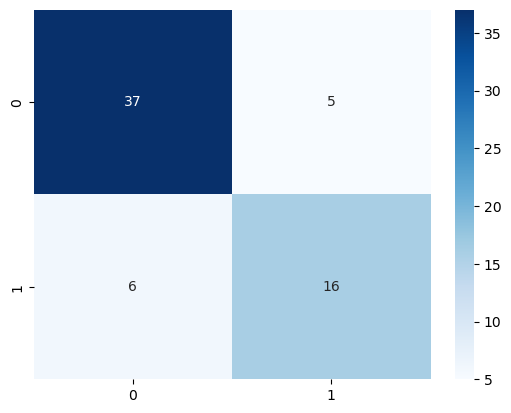

In [50]:
sns.heatmap(confusion_matrix(y_pred,y_true),annot = True,cmap = 'Blues')